In [160]:
import numpy as np
import pylab as pl
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.utils import check_random_state
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans as KMeansGood
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


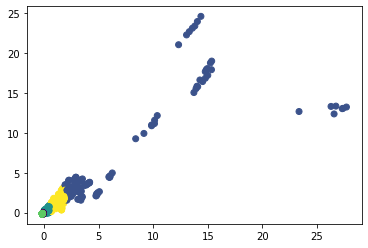

In [156]:
import matplotlib.pyplot as plt

plt.scatter(X.iloc[:,0], X.iloc[:, 1], c= X["cluster"])

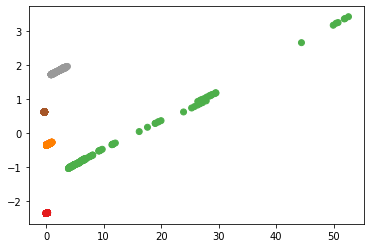

In [157]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()

In [159]:
X

array([[-0.33160283,  0.60978105],
       [-0.33223949,  0.60973173],
       [-0.33168083,  0.60978411],
       ...,
       [-0.31683449,  0.61103502],
       [-0.31545684,  0.61115121],
       [-0.31580352,  0.61112151]])

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

C:\Users\user\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 fro

In [100]:
a = pd.read_csv("./data/fs_all_df.csv", encoding = "euc-kr")

In [102]:
a.drop(a.columns[0], axis = 1, inplace = True)

In [110]:
a[a["부채비율"] == 4.94746377241888]

,종목코드,회사명,시장구분,업종,업종명,결산월,결산기준일,보고서종류,통화,유동자산,...,비유동자산비율,유형자산비율,무형자산비율,유동부채비율,금융부채비율,비유동부채비율,부채비율,이익잉여금비율,자본비율,cluster
3934,[288330],브릿지바이오,코스닥시장상장법인,211.0,기초 의약물질 및 생물학적 제제 제조업,12.0,2018-12-31,사업보고서,KRW,8.584953e+09,...,0.262473,0.009649,0.248671,3.081503,3.078679,1.865961,4.947464,-4.526327,-3.947464,LL1


In [114]:
a[a["회사명"] == "브릿지바이오"][["회사명","자산총계", "부채총계", "자본총계"]]

,회사명,자산총계,부채총계,자본총계
3933,브릿지바이오,1.901025e+10,2.981994e+10,-1.080969e+10
3934,브릿지바이오,1.164019e+10,5.758943e+10,-4.594924e+10
3935,브릿지바이오,7.973713e+10,4.718882e+09,7.501825e+10
3936,브릿지바이오,7.781247e+10,8.618143e+09,6.919433e+10


In [ ]:
ratio_df['부채비율'] = ratio_df['부채총계'] / ratio_df['자산총계']

In [35]:
selected_company_df = tmp[tmp['회사명']=="CJ"]

In [36]:
selected_company_df = a

In [ ]:

selected_date = selected_company_df['결산기준일'].max()
selected_company_df = selected_company_df[selected_company_df['결산기준일'] == selected_date]
selected_company_df = selected_company_df[['회사명','유동자산비율','현금비율','금융자산비율','비유동자산비율','유형자산비율','무형자산비율','유동부채비율','금융부채비율','비유동부채비율','부채비율','이익잉여금비율','자본비율','cluster']]

selected_company_df.info()
type(selected_company_df)
selected_for_grph = pd.Series(selected_company_df.iloc[0])
selected_for_grph.shape



recomm_cols = list(selected_company_df.columns)
top_3 = a[recomm_cols]
top_3 = top_3.iloc[:3]


# cluster별 평균
cluster_num = tmp['cluster'][(tmp['회사명']=="CJ") & (tmp['결산기준일']==selected_date)]
cluster_mean = selected_company_df[selected_company_df['cluster']==cluster_num.values[0]].agg('mean')
type(cluster_mean)
cluster_mean.shape




sns.lineplot()
type(selected_for_grph[1:13].values)
dtype(selected_for_grph[1:13].values)
selected_for_grph[1:13].values

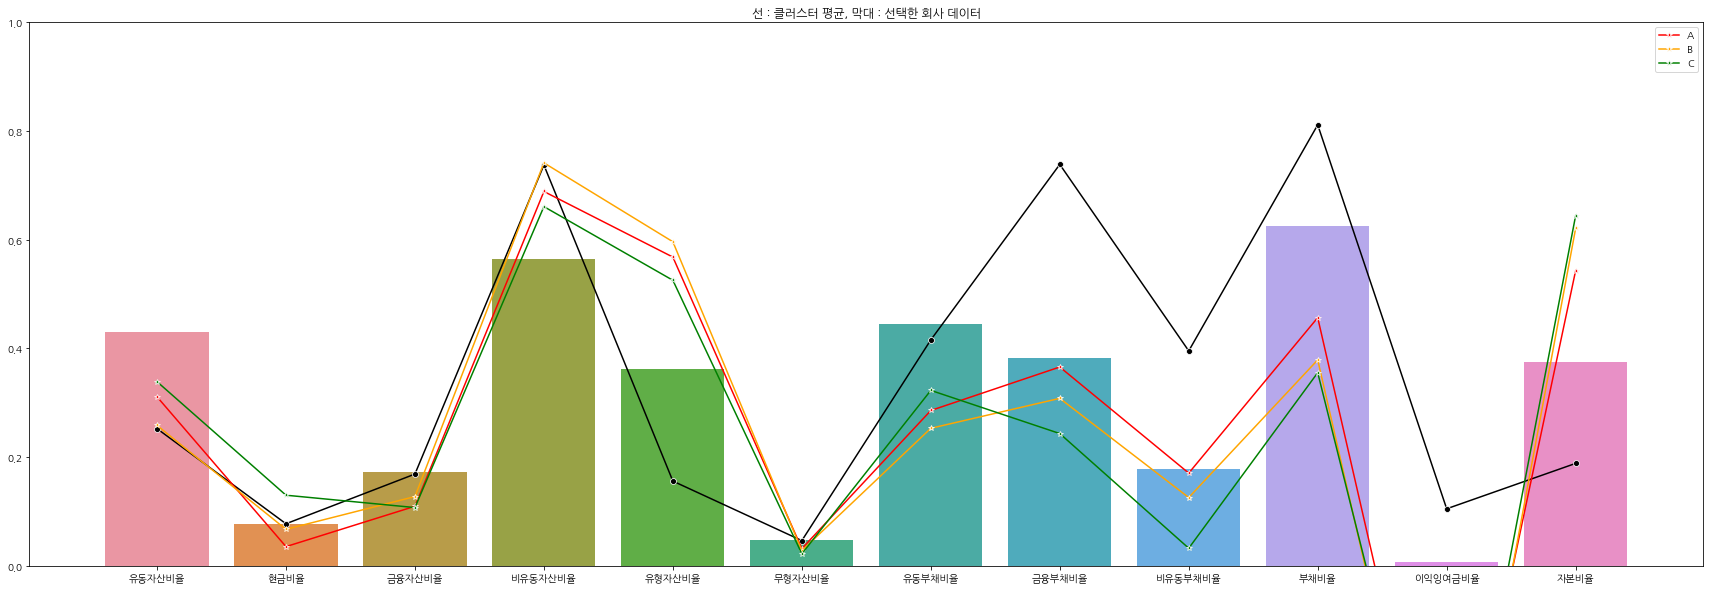

In [99]:
plt.figure(figsize=(30,10))
sns.barplot(x=cluster_mean.index, y=cluster_mean.values)
sns.lineplot(data=selected_company_df.iloc[0,1:13].astype("float").values, marker='o', linestyle='--', color='black')
sns.lineplot(data=top_3.iloc[0,1:13].astype("float").values, marker='*', linestyle='--', color='red', label = "A")
sns.lineplot(data=top_3.iloc[1,1:13].astype("float").values, marker='*', linestyle='--', color='orange', label = "B")
sns.lineplot(data=top_3.iloc[2,1:13].astype("float").values, marker='*', linestyle='--', color='green', label = "C")
legend = plt.legend(loc = "best")
legend.get_title().set_fontsize(16)
plt.ylim(bottom=0.0,top=1.0)
plt.title('선 : 클러스터 평균, 막대 : 선택한 회사 데이터')
plt.show()

In [79]:
top_3.iloc[0,1:13].astype("float")

유동자산비율     0.311187
현금비율       0.035518
금융자산비율     0.109742
비유동자산비율    0.688813
유형자산비율     0.568133
무형자산비율     0.031775
유동부채비율     0.285927
금융부채비율     0.365913
비유동부채비율    0.170760
부채비율       0.456687
이익잉여금비율   -0.575896
자본비율       0.543313
Name: 0, dtype: float64

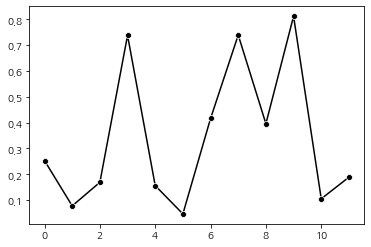

In [94]:
sns.lineplot(data=selected_company_df.iloc[0,1:13].astype("float").values, marker='o', linestyle='--', color='black')

In [64]:
df_1 = top_3.iloc[0,1:13].astype("float")
df_2 = top_3.iloc[1,1:13].astype("float")
df_3 = top_3.iloc[2,1:13].astype("float")

In [68]:
df_1

유동자산비율      0.311187
현금비율       0.0355179
금융자산비율      0.109742
비유동자산비율     0.688813
유형자산비율      0.568133
무형자산비율     0.0317755
유동부채비율      0.285927
금융부채비율      0.365913
비유동부채비율      0.17076
부채비율        0.456687
이익잉여금비율    -0.575896
자본비율        0.543313
region             A
Name: 0, dtype: object

In [ ]:
df_1['region'] = 'A'
df_2['region'] = 'B'
df_3['region'] = 'C'
df = pd.concat([df_1,df_2,df_3])
sns.lineplot(data=df.iloc[:,1:13])

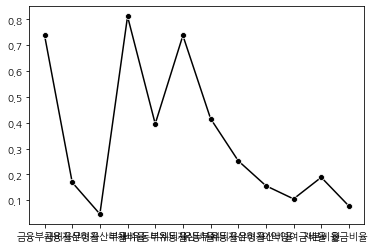

In [77]:
sns.lineplot(data=selected_company_df.iloc[0,1:13].astype("float"), marker='o', linestyle='--', color='black')

유동자산비율     0.252612
현금비율       0.077561
금융자산비율     0.169002
비유동자산비율    0.737416
유형자산비율     0.156041
무형자산비율     0.046577
유동부채비율     0.415839
금융부채비율     0.738621
비유동부채비율    0.395542
부채비율       0.811381
이익잉여금비율    0.105124
자본비율       0.188619
Name: 12, dtype: float64